# Introduction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, roc_auc_score
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import trigrams
from  nltk import ngrams
import ipywidgets as widgets
from IPython.display import display

In [ ]:
#Loading the final cleaned datasets

merged_file_df = pd.read_csv('drive/MyDrive/college/northeastern-university/ExperientialProject/Merged_File.csv')

In [ ]:
merged_file_df

,Exam_ID,Disease_Severity,Ulcer,Exam_Notes,Image_Info
0,1406AC09B0BC45599587E7395C3D8B1D,Active,No,LON Complications immediate complications Indi...,Appendiceal Orifice Terminal ileum Ascending C...
1,D2239336F625403A9A08EE7C663BBC04,Inactive,No,BPS Without Definitions Magnification Narrow B...,Appendiceal Orifice Ileocecal Valve Terminal i...
2,74995F16C15848FA8A1846849B6944FB,Active,Yes,Complications immediate complications Indicati...,Rectum Normal mucosa seen 40cm anal verge Sigm...
3,7E52796D52EB43BE8B39B3B14AFE08D2,Inactive,No,Complications immediate complications Estimate...,Splenic Flexure Descending Colon Descending Co...
4,3908FC01091A445B88E2D241A85BA442,Active,Yes,andmarks Photographed BBPS Without Definitions...,Appendiceal Orifice Ileocecal Valve Terminal i...
...,...,...,...,...,...
725,CDCBA85CFCB34126B3EFB16997A8F3B3,Inactive,No,EC760RVL 4C729G463 Complications immediate com...,CecumAppendiceal OrificeIleocecal ValveRectum
726,20C54B69EE75430598FE88C74E2E21FB,Active,Yes,scope Complications immediate complications In...,Appendiceal OrificeTerminal ileumTerminal ileu...
727,F7276C19E14D4D419F04A77B68B3CCA2,Inactive,No,Adult Colonoscope 116 Complications immediate ...,Cecum InflammationTerminal ileum Normal Termin...
728,A295B124D003439993ECDC13289585FD,Active,Yes,Pediatric Scope 144 Complications immediate co...,Rectum Inflammatory Bowel DiseaseDescending Co...


In [ ]:
import spacy
!pip install medspacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.4/111.4 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 44.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 25.5 MB/s eta 0:00:00
  Created wheel for medspacy: filename=medspacy-1.1.2-py3-none-any.whl size=147920 sha256=a8548e8ad73d8e671342eef099794d8c3bbd87268946e65455e36210fff09f75
  Stor

In [ ]:
import medspacy
# Option 1: Load default
# nlp = medspacy.load()

# Option 2: Load from existing model
#nlp = spacy.load("en_core_web_sm")
nlp = medspacy.load()

print(nlp.pipe_names)

['medspacy_pyrush', 'medspacy_target_matcher', 'medspacy_context']


In [ ]:
train = ['Endoscopes PEDIATRIC 121 FUJI 2C738G121 introduced anus advanced ileocolonic anastomosis' , {entities = ('Endoscopy' = (11, 39)), ('Organ' = (52, 56)), ('Problem' = (66, 80))}
          'PreAnesthesia Assessment ASA anticoagulants', {}
          'Prior History Physical performed medications allergies reviewed s tolerance previous anesthesia also reviewed risks benefits sedation options risks discussed questions answered informed consent obtained', {}
          'Prior Anticoagulants taken anticoagulant antiplatelet agents', {}
          'ASA Grade Assessment II mild systemic disease reviewing risks benefits deemed satisfactory condition undergo', {}]

## Tokenization

In [ ]:
print(merged_file_df['Exam_Notes'].dtype)
merged_file_df['Image_Info'] = merged_file_df['Image_Info'].astype(str)

object


In [ ]:
# Convert Exam_Notes column to lowercase
merged_file_df['Exam_Notes_lower'] = [note.lower() for note in merged_file_df['Exam_Notes'].tolist()]
merged_file_df['Image_Info_lower'] = [note.lower() for note in merged_file_df['Image_Info'].tolist()]

In [ ]:
merged_file_df

,Exam_ID,Disease_Severity,Ulcer,Exam_Notes,Image_Info,Exam_Notes_tokens,Image_Info_tokens,Exam_Notes_lower,Image_Info_lower
0,1406AC09B0BC45599587E7395C3D8B1D,Active,No,Endoscopes 5879 COLON undefined Complications ...,Appendiceal OrificeTerminal ileumAscending Col...,"[Endoscopes, 5879, COLON, undefined, Complicat...","[Appendiceal, OrificeTerminal, ileumAscending,...",endoscopes 5879 colon undefined complications ...,appendiceal orificeterminal ileumascending col...
1,D2239336F625403A9A08EE7C663BBC04,Inactive,No,DifficultyTolerance BBPS Without Definitions u...,Appendiceal OrificeIleocecal ValveTerminal ile...,"[DifficultyTolerance, BBPS, Without, Definitio...","[Appendiceal, OrificeIleocecal, ValveTerminal,...",difficultytolerance bbps without definitions u...,appendiceal orificeileocecal valveterminal ile...
2,74995F16C15848FA8A1846849B6944FB,Active,Yes,Endoscopes 5689 EGD undefined Complications im...,RectumNormal mucosa seen 40cm anal vergeSigmoi...,"[Endoscopes, 5689, EGD, undefined, Complicatio...","[RectumNormal, mucosa, seen, 40cm, anal, verge...",endoscopes 5689 egd undefined complications im...,rectumnormal mucosa seen 40cm anal vergesigmoi...
3,7E52796D52EB43BE8B39B3B14AFE08D2,Inactive,No,Endoscopes 5693 EGD undefined Complications im...,Splenic FlexureDescending ColonDescending Colo...,"[Endoscopes, 5693, EGD, undefined, Complicatio...","[Splenic, FlexureDescending, ColonDescending, ...",endoscopes 5693 egd undefined complications im...,splenic flexuredescending colondescending colo...
4,3908FC01091A445B88E2D241A85BA442,Active,Yes,DifficultyTolerance Landmarks Photographed und...,Appendiceal OrificeIleocecal ValveTerminal ile...,"[DifficultyTolerance, Landmarks, Photographed,...","[Appendiceal, OrificeIleocecal, ValveTerminal,...",difficultytolerance landmarks photographed und...,appendiceal orificeileocecal valveterminal ile...
...,...,...,...,...,...,...,...,...,...
723,CDCBA85CFCB34126B3EFB16997A8F3B3,Inactive,No,Endoscopes 2 Fuji EC760RVL 4C729G463 undefined...,CecumAppendiceal OrificeIleocecal ValveRectum,"[Endoscopes, 2, Fuji, EC760RVL, 4C729G463, und...","[CecumAppendiceal, OrificeIleocecal, ValveRectum]",endoscopes 2 fuji ec760rvl 4c729g463 undefined...,cecumappendiceal orificeileocecal valverectum
724,20C54B69EE75430598FE88C74E2E21FB,Active,Yes,Endoscopes loaner scope undefined Complication...,Appendiceal OrificeTerminal ileumTerminal ileu...,"[Endoscopes, loaner, scope, undefined, Complic...","[Appendiceal, OrificeTerminal, ileumTerminal, ...",endoscopes loaner scope undefined complication...,appendiceal orificeterminal ileumterminal ileu...
725,F7276C19E14D4D419F04A77B68B3CCA2,Inactive,No,Endoscopes Olympus Adult Colonoscope 116 undef...,Cecum InflammationTerminal ileum Normal Termin...,"[Endoscopes, Olympus, Adult, Colonoscope, 116,...","[Cecum, InflammationTerminal, ileum, Normal, T...",endoscopes olympus adult colonoscope 116 undef...,cecum inflammationterminal ileum normal termin...
726,A295B124D003439993ECDC13289585FD,Active,Yes,Endoscopes Olympus Pediatric Scope 144 undefin...,Rectum Inflammatory Bowel DiseaseDescending Co...,"[Endoscopes, Olympus, Pediatric, Scope, 144, u...","[Rectum, Inflammatory, Bowel, DiseaseDescendin...",endoscopes olympus pediatric scope 144 undefin...,rectum inflammatory bowel diseasedescending co...


In [ ]:
# Tokenization

#lemmatizer = WordNetLemmatizer()

# Apply lemmatization on Exam_Notes column
#merged_file_df['Exam_Notes_tokens'] = merged_file_df['Exam_Notes'].apply(lambda x: [lemmatizer.lemmatize(token) for token in word_tokenize(x)])

# Apply lemmatization on Image_Info column
#merged_file_df['Image_Info_tokens'] = merged_file_df['Image_Info'].apply(lambda x: [lemmatizer.lemmatize(token) for token in word_tokenize(x)])

# Tokenize the values in 'Exam_Notes' column
#merged_file_df['Exam_Notes_tokens'] = merged_file_df['Exam_Notes_lower'].apply(lambda x: word_tokenize(x))

# Tokenize the values in 'Image_Info' column
#merged_file_df['Image_Info_tokens'] = merged_file_df['Image_Info_lower'].apply(lambda x: word_tokenize(x))

# Function to generate trigrams from a text
def generate_trigrams(text):
    words = text.lower().split()
    return list(trigrams(words))

# Apply the trigram generation function to the 'Text' column and store the trigrams in a new column 'Trigrams'
#merged_file_df['Trigrams'] = merged_file_df['Exam_Notes'].apply(generate_trigrams)

# Function to generate n-grams from a text
n = 3
n1 =4
n2 =2

def generate_ngrams(text, n):
    words = text.lower().split()
    return list(ngrams(words, n))

# Apply the n-gram generation function to the 'Text' column and store the n-grams in a new column 'Ngrams'
merged_file_df['Trigrams'] = merged_file_df['Exam_Notes'].apply(lambda x: generate_ngrams(x, n))
merged_file_df['fourgrams'] = merged_file_df['Exam_Notes'].apply(lambda x: generate_ngrams(x, n1))
merged_file_df['bigrams'] = merged_file_df['Exam_Notes'].apply(lambda x: generate_ngrams(x, n2))

In [ ]:
merged_file_df

,Exam_ID,Disease_Severity,Ulcer,Exam_Notes,Image_Info,Exam_Notes_tokens,Image_Info_tokens,Exam_Notes_lower,Image_Info_lower,Trigrams,fourgrams,bigrams
0,1406AC09B0BC45599587E7395C3D8B1D,Active,No,Endoscopes 5879 COLON undefined Complications ...,Appendiceal OrificeTerminal ileumAscending Col...,"[endoscopes, 5879, colon, undefined, complicat...","[appendiceal, orificeterminal, ileumascending,...",endoscopes 5879 colon undefined complications ...,appendiceal orificeterminal ileumascending col...,"[(endoscopes, 5879, colon), (5879, colon, unde...","[(endoscopes, 5879, colon, undefined), (5879, ...","[(endoscopes, 5879), (5879, colon), (colon, un..."
1,D2239336F625403A9A08EE7C663BBC04,Inactive,No,DifficultyTolerance BBPS Without Definitions u...,Appendiceal OrificeIleocecal ValveTerminal ile...,"[difficultytolerance, bbps, without, definitio...","[appendiceal, orificeileocecal, valveterminal,...",difficultytolerance bbps without definitions u...,appendiceal orificeileocecal valveterminal ile...,"[(difficultytolerance, bbps, without), (bbps, ...","[(difficultytolerance, bbps, without, definiti...","[(difficultytolerance, bbps), (bbps, without),..."
2,74995F16C15848FA8A1846849B6944FB,Active,Yes,Endoscopes 5689 EGD undefined Complications im...,RectumNormal mucosa seen 40cm anal vergeSigmoi...,"[endoscopes, 5689, egd, undefined, complicatio...","[rectumnormal, mucosa, seen, 40cm, anal, verge...",endoscopes 5689 egd undefined complications im...,rectumnormal mucosa seen 40cm anal vergesigmoi...,"[(endoscopes, 5689, egd), (5689, egd, undefine...","[(endoscopes, 5689, egd, undefined), (5689, eg...","[(endoscopes, 5689), (5689, egd), (egd, undefi..."
3,7E52796D52EB43BE8B39B3B14AFE08D2,Inactive,No,Endoscopes 5693 EGD undefined Complications im...,Splenic FlexureDescending ColonDescending Colo...,"[endoscopes, 5693, egd, undefined, complicatio...","[splenic, flexuredescending, colondescending, ...",endoscopes 5693 egd undefined complications im...,splenic flexuredescending colondescending colo...,"[(endoscopes, 5693, egd), (5693, egd, undefine...","[(endoscopes, 5693, egd, undefined), (5693, eg...","[(endoscopes, 5693), (5693, egd), (egd, undefi..."
4,3908FC01091A445B88E2D241A85BA442,Active,Yes,DifficultyTolerance Landmarks Photographed und...,Appendiceal OrificeIleocecal ValveTerminal ile...,"[difficultytolerance, landmarks, photographed,...","[appendiceal, orificeileocecal, valveterminal,...",difficultytolerance landmarks photographed und...,appendiceal orificeileocecal valveterminal ile...,"[(difficultytolerance, landmarks, photographed...","[(difficultytolerance, landmarks, photographed...","[(difficultytolerance, landmarks), (landmarks,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
723,CDCBA85CFCB34126B3EFB16997A8F3B3,Inactive,No,Endoscopes 2 Fuji EC760RVL 4C729G463 undefined...,CecumAppendiceal OrificeIleocecal ValveRectum,"[endoscopes, 2, fuji, ec760rvl, 4c729g463, und...","[cecumappendiceal, orificeileocecal, valverectum]",endoscopes 2 fuji ec760rvl 4c729g463 undefined...,cecumappendiceal orificeileocecal valverectum,"[(endoscopes, 2, fuji), (2, fuji, ec760rvl), (...","[(endoscopes, 2, fuji, ec760rvl), (2, fuji, ec...","[(endoscopes, 2), (2, fuji), (fuji, ec760rvl),..."
724,20C54B69EE75430598FE88C74E2E21FB,Active,Yes,Endoscopes loaner scope undefined Complication...,Appendiceal OrificeTerminal ileumTerminal ileu...,"[endoscopes, loaner, scope, undefined, complic...","[appendiceal, orificeterminal, ileumterminal, ...",endoscopes loaner scope undefined complication...,appendiceal orificeterminal ileumterminal ileu...,"[(endoscopes, loaner, scope), (loaner, scope, ...","[(endoscopes, loaner, scope, undefined), (loan...","[(endoscopes, loaner), (loaner, scope), (scope..."
725,F7276C19E14D4D419F04A77B68B3CCA2,Inactive,No,Endoscopes Olympus Adult Colonoscope 116 undef...,Cecum InflammationTerminal ileum Normal Termin...,"[endoscopes, olympus, adult, colonoscope, 116,...","[cecum, inflammationterminal, ileum, normal, t...",endo

In [ ]:
from collections import Counter
import itertools

def wordcount(columnname):
    flattened_tokens = list(itertools.chain.from_iterable(merged_file_df[columnname]))
    # Calculate word frequencies
    word_freq = Counter(flattened_tokens)

    # Sort words based on frequency
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    # Print the sorted words and their counts
    for word, count in sorted_words:
        print(f'{word}: {count}')


wordcount("Trigrams")
wordcount("fourgrams")
wordcount("bigrams")

('await', 'pathology', 'results'): 1620
('undefined', 'colon', 'undefined'): 1371
('pathology', 'results', 'undefined'): 1335
('continue', 'present', 'medications'): 1293
('present', 'medications', 'undefined'): 1053
('repeat', 'colonoscopy', 'undefined'): 1040
('undefined', 'continue', 'present'): 981
('colon', 'undefined', 'colon'): 844
('undefined', 'repeat', 'colonoscopy'): 802
('complications', 'immediate', 'complications'): 790
('contact', 'number', 'delayed'): 746
('number', 'delayed', 'complications'): 746
('delayed', 'complications', 'return'): 746
('discharge', 'home', 'undefined'): 701
('undefined', 'await', 'pathology'): 664
('undefined', 'complications', 'immediate'): 660
('tolerated', 'well', 'undefined'): 652
('undefined', 'tolerated', 'well'): 625
('undefined', 'diet', 'undefined'): 622
('undefined', 'discharge', 'home'): 618
('complications', 'return', 'activity'): 596
('return', 'activity', 'written'): 596
('activity', 'written', 'instructions'): 596
('written', 'inst

In [ ]:
# Create a VBox layout to display the DataFrame and plot side by side
layout = widgets.Layout(width='33%')
plot_widget1 = widgets.Output(layout=layout)
plot_widget2 = widgets.Output(layout=layout)
plot_widget3 = widgets.Output(layout=layout)

def plot_zipfslaw(columnname):
    # Rank the words
    flattened_tokens = list(itertools.chain.from_iterable(merged_file_df[columnname]))
    # Calculate word frequencies
    word_freq = Counter(flattened_tokens)
    ranked_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    ranks = range(1, len(ranked_words) + 1)

    # Plot the frequency-rank distribution
    frequencies = [freq for word, freq in ranked_words]
    plt.scatter(ranks, frequencies, marker='.')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Zipf\'s Law' +columnname )
    # Add the reference line
    k = frequencies[0] * ranks[-1]  # Adjust the constant value as desired
    reference_line = [k / i for i in ranks]
    plt.plot(ranks, reference_line, color='red', linestyle='--', label='Zipf\'s Law')

    plt.legend()
    plt.show()

with plot_widget1:
    plot_zipfslaw("Trigrams")

with plot_widget2:
    plot_zipfslaw("fourgrams")

with plot_widget3:
    plot_zipfslaw("bigrams")

# Create an HBox layout to display the df_widget and plot_widget horizontally
display(widgets.HBox([plot_widget1, plot_widget2, plot_widget3]))

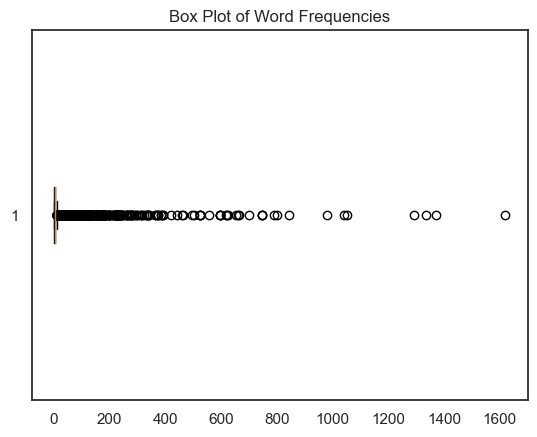

Outliers:
[('await', 'pathology', 'results'), ('undefined', 'colon', 'undefined'), ('pathology', 'results', 'undefined'), ('continue', 'present', 'medications'), ('present', 'medications', 'undefined'), ('repeat', 'colonoscopy', 'undefined'), ('undefined', 'continue', 'present'), ('colon', 'undefined', 'colon'), ('undefined', 'repeat', 'colonoscopy'), ('complications', 'immediate', 'complications'), ('contact', 'number', 'delayed'), ('number', 'delayed', 'complications'), ('delayed', 'complications', 'return'), ('discharge', 'home', 'undefined'), ('undefined', 'await', 'pathology'), ('undefined', 'complications', 'immediate'), ('tolerated', 'well', 'undefined'), ('undefined', 'tolerated', 'well'), ('undefined', 'diet', 'undefined'), ('undefined', 'discharge', 'home'), ('complications', 'return', 'activity'), ('return', 'activity', 'written'), ('activity', 'written', 'instructions'), ('written', 'instructions', 'undefined'), ('immediate', 'complications', 'undefined'), ('date', 'last', 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the frequencies from the ranked_words list
frequencies = [freq for word, freq in ranked_words]

# Calculate the interquartile range (IQR)
Q1 = np.percentile(frequencies, 25)
Q3 = np.percentile(frequencies, 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [word for word, freq in ranked_words if freq < lower_bound or freq > upper_bound]

# Plot a box plot to visualize outliers
plt.boxplot(frequencies, vert=False)
plt.title('Box Plot of Word Frequencies')
plt.show()

print("Outliers:")
print(outliers)

In [ ]:
from collections import Counter
import itertools

# Flatten the lists in the "Exam_Notes_tokens" column
flattened_tokens1 = list(itertools.chain.from_iterable(merged_file_df["Image_Info_tokens"]))

# Calculate word frequencies
word_freq1 = Counter(flattened_tokens1)


# Sort words based on frequency
sorted_words1 = sorted(word_freq1.items(), key=lambda x: x[1], reverse=True)

# Print the sorted words and their counts
for word, count in sorted_words1:
    print(f'{word}: {count}')

Colon: 1890
Endo: 1040
Bowel: 755
UC: 693
Mayo: 663
Inflammatory: 615
Normal: 541
ileum: 521
Terminal: 423
ColonSigmoid: 417
Crohns: 347
Simple: 347
ColonDescending: 289
Otherwise: 275
ScoreSigmoid: 218
ColonTransverse: 207
ScoreRectum: 205
NL: 187
Flexure: 167
Score: 163
Abnormal: 156
Valve: 152
Appendiceal: 147
Orifice: 146
Single: 128
IleumTerminal: 125
ileumTerminal: 114
Disease: 108
DiseaseSigmoid: 107
ScoreDescending: 106
ScoreTransverse: 97
ColonRectum: 93
IleumAscending: 92
Anastomosis: 92
Rectum: 91
Exam: 90
NormalSigmoid: 86
OrificeTerminal: 83
NormalRectum: 81
ValveTerminal: 79
Inflammation: 79
ColonAscending: 78
DiseaseRectum: 78
ColonRectumRectum: 76
InflammationTerminal: 76
Sigmoid: 74
NormalTransverse: 74
Retroflexion: 73
NormalDescending: 70
Hemorrhoids: 69
OrificeIleocecal: 68
DiseaseTransverse: 65
BowelSmall: 65
DiseaseDescending: 57
Evidence: 57
previous: 57
Multiple: 54
NormalAscending: 54
Transverse: 53
FlexureTransverse: 52
NormalTerminal: 52
Ileocecal: 49
ScoreAs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the frequencies from the ranked_words list
frequencies = [freq for word, freq in ranked_words]

# Calculate the interquartile range (IQR)
Q1 = np.percentile(frequencies, 25)
Q3 = np.percentile(frequencies, 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [word for word, freq in ranked_words if freq < lower_bound or freq > upper_bound]

# Plot a box plot to visualize outliers
plt.boxplot(frequencies, vert=False)
plt.title('Box Plot of Word Frequencies')
plt.show()

print("Outliers:")
print(outliers)

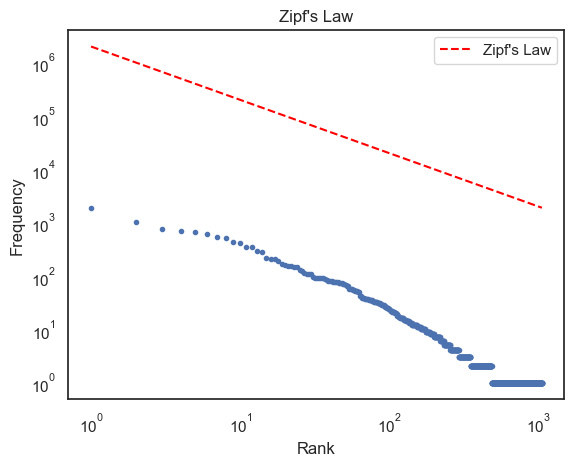

In [ ]:
# Rank the words
ranked_words1 = sorted(word_freq1.items(), key=lambda x: x[1], reverse=True)
ranks1 = range(1, len(ranked_words1) + 1)

# Plot the frequency-rank distribution
frequencies1 = [freq for word, freq in ranked_words1]
plt.scatter(ranks1, frequencies1, marker='.')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.title('Zipf\'s Law')
# Add the reference line
k = frequencies1[0] * ranks1[-1]  # Adjust the constant value as desired
reference_line1 = [k / i for i in ranks1]
plt.plot(ranks1, reference_line1, color='red', linestyle='--', label='Zipf\'s Law')

plt.legend()
plt.show()

## Vectorization

In [ ]:
def BagOfWordsVectorization(columns,newColumn):
    # Get the tokenized text from the DataFrame
    tokenized_text = merged_file_df[columns]

    # Convert tokenized text back to strings
    preprocessed_text = [' '.join(tokens) for tokens in tokenized_text]

    # Create an instance of CountVectorizer
    vectorizer = CountVectorizer()
    # Fit the vectorizer on the preprocessed text and transform it
    vectorized_data = vectorizer.fit_transform(preprocessed_text).toarray()

    # Create a new column in the DataFrame with the vectorized data
    merged_file_df[newColumn] = pd.Series(vectorized_data.tolist())

In [ ]:
def NGramVectorization(columns,newColumn):
    # Get the tokenized text from the DataFrame
    tokenized_text = merged_file_df[columns]

    # Convert tokenized text back to strings
    preprocessed_text = [' '.join(tokens) for tokens in tokenized_text]

    # Create an instance of TfidfVectorizer
    vectorizer = TfidfVectorizer(ngram_range=(1, 1))
    # Fit the vectorizer on the preprocessed text and transform it
    vectorized_data = vectorizer.fit_transform(preprocessed_text).toarray()

    # Create a new column in the DataFrame with the vectorized data
    merged_file_df[newColumn] = pd.Series(vectorized_data.tolist())


In [ ]:
NGramVectorization('Exam_Notes_tokens','Exam_Notes_vectorized')
NGramVectorization('Image_Info_tokens','ImageInfo_vectorized')

In [ ]:
merged_file_df = merged_file_df.drop(['Exam_ID','Exam_Notes','Exam_Notes_tokens','Image_Info_tokens','Image_Info'],axis=1)

## Encoding categeorical variables

In [ ]:
merged_file_df["Disease_Severity"] = merged_file_df["Disease_Severity"].apply(lambda x: 1 if x == "Active" else 0)
merged_file_df["Ulcer"] = merged_file_df["Ulcer"].apply(lambda x: 1 if x == "Yes" else 0)

In [ ]:
merged_file_df

,Disease_Severity,Ulcer,Exam_Notes_vectorized,ImageInfo_vectorized
0,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
723,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
724,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
725,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
726,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


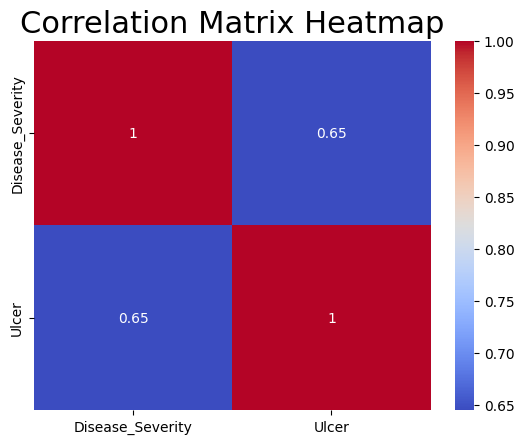

In [ ]:
#correlation matrix
selected_columns = ['Disease_Severity', 'Ulcer']
correlation_df = merged_file_df[selected_columns]

sns.heatmap(correlation_df.corr(), annot = True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap",fontsize=22)
plt.show()

Disease Severity and Ulcer have a positive correlation of 0.645024. This indicates that there is a moderate positive relationship between Disease Severity and Ulcer. As the severity of the disease increases, the presence or severity of ulcers also tends to increase.

In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(correlation_df['Disease_Severity'], correlation_df['Ulcer'])

# Print the cross-tabulation
print(cross_tab)

Ulcer               0    1
Disease_Severity          
0                 309   51
1                  79  289


From this cross-tabulation table we observe the association between Disease_Severity and Ulcer. we can see that the majority of instances with Disease_Severity being 0 also have Ulcer being 0, while the majority of instances with Disease_Severity being 1 have Ulcer being 1.

There seems to be an imbalance in the distribution of Ulcer across different levels of Disease_Severity. For Disease_Severity 0, there is a higher frequency of Ulcer being 0, whereas for Disease_Severity 1, there is a higher frequency of Ulcer being 1. This difference suggests a potential association between the variables.

From this we can say that ulcers could potentially serve as a marker of whether a patient having Active or Inactive disease.

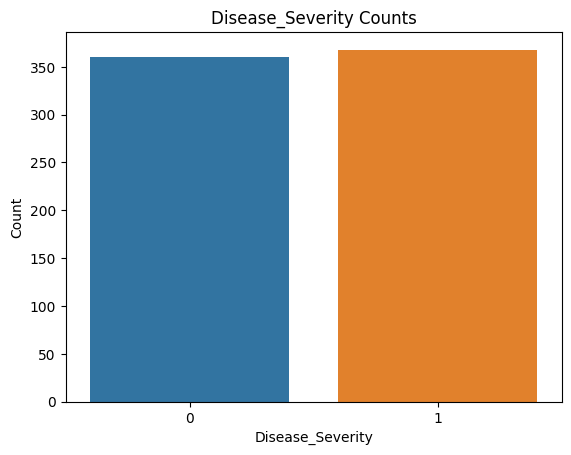

In [ ]:
sns.countplot(x='Disease_Severity', data=merged_file_df)
plt.title('Disease_Severity Counts')
plt.xlabel('Disease_Severity')
plt.ylabel('Count')
plt.show()

## Splitting of Training and test data

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(correlation_df.drop('Disease_Severity', axis=1), correlation_df['Disease_Severity'], test_size=0.2, random_state=42)

In [ ]:
# Convert the word vectors to a numeric format
X_train_exam = pd.DataFrame(X_train['Exam_Notes_vectorized'].apply(pd.Series))
X_train_image = pd.DataFrame(X_train['ImageInfo_vectorized'].apply(pd.Series))
X_train = pd.concat([X_train_exam, X_train_image], axis=1)

X_test_exam = pd.DataFrame(X_test['Exam_Notes_vectorized'].apply(pd.Series))
X_test_image = pd.DataFrame(X_test['ImageInfo_vectorized'].apply(pd.Series))
X_test = pd.concat([X_test_exam, X_test_image], axis=1)

## Model Building SVM

In [ ]:
# Create an SVM classifier object
svm_model = SVC(C=10, kernel='rbf',degree=1, gamma =0.01, probability=True)

# Fit the SVM classifier on the training data
svm_model.fit(X_train, y_train)

SVC(C=10, degree=1, gamma=0.01, probability=True)

In [ ]:
# Make predictions on the test data
SVM_pred_train = svm_model.predict(X_train)

# Make predictions on the test data
SVM_pred = svm_model.predict(X_test)

# Compute the metrics for the SVM
SVM_accuracy = accuracy_score(y_test, SVM_pred)
SVM_f1 = f1_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred)
SVM_recall = recall_score(y_test, SVM_pred)


# Evaluate the performance of the SVM model
accuracy_train = accuracy_score(y_train, SVM_pred_train)

print("Training accuracy:", accuracy_train)

report = classification_report(y_test, SVM_pred)

print("Testing Accuracy:", SVM_accuracy)
print("Classification Report:")
print(report)

Training accuracy: 0.8384879725085911
Testing Accuracy: 0.7534246575342466
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        80
           1       0.75      0.68      0.71        66

    accuracy                           0.75       146
   macro avg       0.75      0.75      0.75       146
weighted avg       0.75      0.75      0.75       146



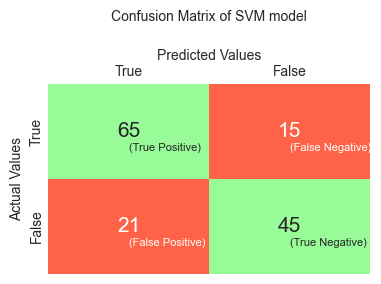

In [ ]:
# Get the confusion matrix for the neural network model
cf_matrix = confusion_matrix(y_test, SVM_pred)

# Get the confusion matrix

sns.set(style='white')
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(np.eye(2), annot=cf_matrix, fmt='g', annot_kws={'size': 15},
            cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
            yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)

ax.set_title('Confusion Matrix of SVM model', size=10, pad=20)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
for text_elt, additional_text in zip(ax.texts, additional_texts):
    ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(), va='top', size=8)
plt.tight_layout()
plt.show()

# Model Building Neural Networks

In [ ]:
# define the MLPClassifier model with desired hyperparameters
mlp_model = MLPClassifier(hidden_layer_sizes=(50), alpha=3, activation='tanh', solver='adam',max_iter=1000,  random_state=42)
# train the model on the training data
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=3, hidden_layer_sizes=50, max_iter=1000,
              random_state=42)

In [ ]:
# Make predictions on the test data
NN_pred_train = mlp_model.predict(X_train)

# Make predictions on the test data
NN_pred = mlp_model.predict(X_test)

# Compute the metrics for the NN
NN_accuracy = accuracy_score(y_test, NN_pred)
NN_f1 = f1_score(y_test, NN_pred)
NN_precision = precision_score(y_test, NN_pred)
NN_recall = recall_score(y_test, NN_pred)


# Evaluate the performance of the NN model
accuracy_train = accuracy_score(y_train, NN_pred_train)

print("Training accuracy:", accuracy_train)

report = classification_report(y_test, SVM_pred)

print("Testing Accuracy:", NN_accuracy)
print("Classification Report:")
print(report)

Training accuracy: 0.8384879725085911
Testing Accuracy: 0.7534246575342466
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        80
           1       0.75      0.68      0.71        66

    accuracy                           0.75       146
   macro avg       0.75      0.75      0.75       146
weighted avg       0.75      0.75      0.75       146



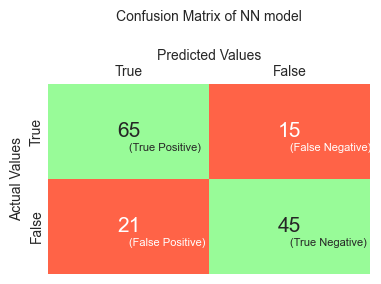

In [ ]:
# Get the confusion matrix for the neural network model
cf_matrix = confusion_matrix(y_test, NN_pred)

# Get the confusion matrix

sns.set(style='white')
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(np.eye(2), annot=cf_matrix, fmt='g', annot_kws={'size': 15},
            cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
            yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)

ax.set_title('Confusion Matrix of NN model', size=10, pad=20)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
for text_elt, additional_text in zip(ax.texts, additional_texts):
    ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(), va='top', size=8)
plt.tight_layout()
plt.show()

# Gradient Boost Model

In [ ]:
# Build the model
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.003, max_depth=3,subsample=0.9, max_features='sqrt', random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.003, max_features='sqrt',
                           n_estimators=300, random_state=42, subsample=0.9)

In [ ]:
# Make predictions on the test data
gb_pred_train = gb_model.predict(X_train)

# Make predictions on the test data
gb_pred = gb_model.predict(X_test)

# Compute the metrics for the GB
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)


# Evaluate the performance of the GB model
accuracy_train = accuracy_score(y_train, gb_pred_train)

print("Training accuracy:", accuracy_train)

report = classification_report(y_test, gb_pred)

print("Testing Accuracy:", gb_accuracy)
print("Classification Report:")
print(report)

Training accuracy: 0.8384879725085911
Testing Accuracy: 0.7534246575342466
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        80
           1       0.75      0.68      0.71        66

    accuracy                           0.75       146
   macro avg       0.75      0.75      0.75       146
weighted avg       0.75      0.75      0.75       146



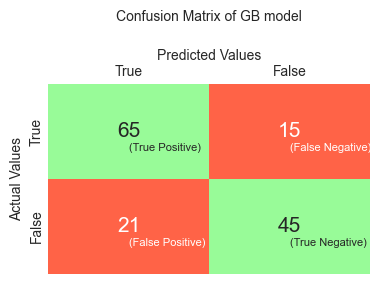

In [ ]:
# Get the confusion matrix for the neural network model
cf_matrix = confusion_matrix(y_test, gb_pred)

# Get the confusion matrix

sns.set(style='white')
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(np.eye(2), annot=cf_matrix, fmt='g', annot_kws={'size': 15},
            cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
            yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)

ax.set_title('Confusion Matrix of GB model', size=10, pad=20)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
for text_elt, additional_text in zip(ax.texts, additional_texts):
    ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(), va='top', size=8)
plt.tight_layout()
plt.show()

# Decision Tree Classifier

In [ ]:
# Define the parameter grid to search over
param_grid = {'max_depth': range(1, 20)}

# Create a decision tree model
tree_model1 = DecisionTreeClassifier(random_state=42)

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(tree_model1, param_grid, cv=15)

# Train the model on the resampled training data
grid_search.fit(X_train, y_train)

best_max_depth = int(grid_search.best_params_['max_depth'])

# Create a decision tree model with at most 5 branches
tree_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train);

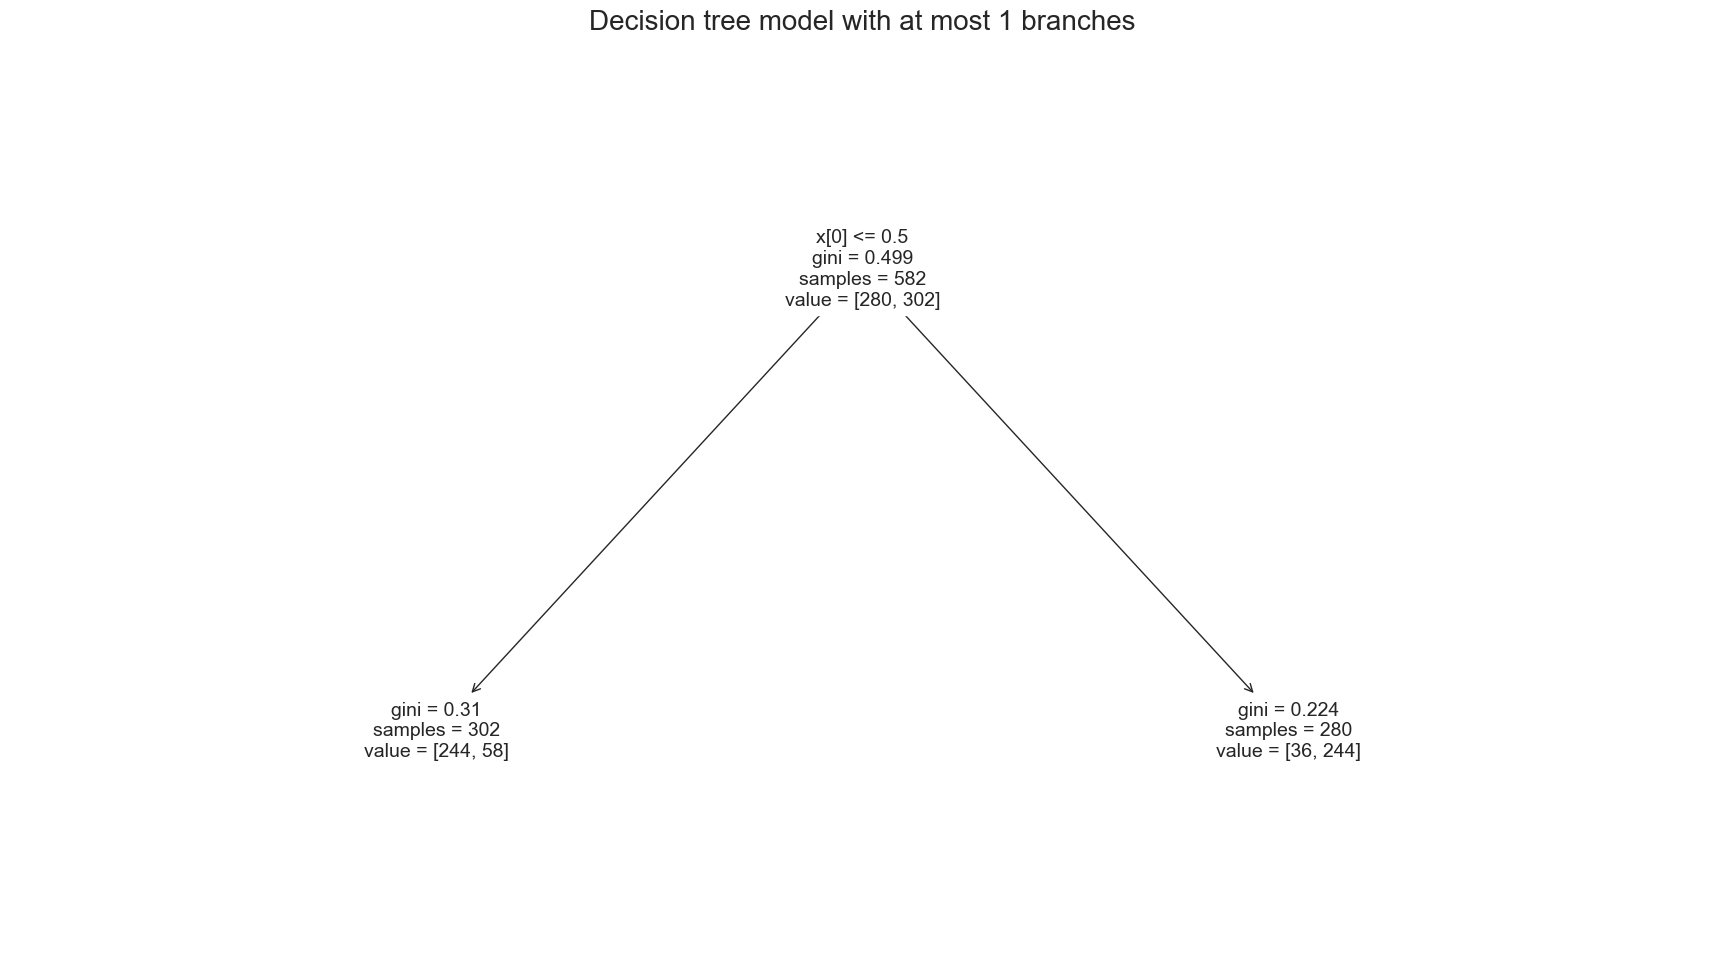

In [ ]:
fig, ax = plt.subplots(figsize=(22, 12))
plot_tree(tree_model, ax=ax, fontsize=14)
plt.title("Decision tree model with at most " + str(best_max_depth) + " branches",size=20)
plt.show()

In [ ]:
# Make predictions on the test data
DT_pred_train = tree_model.predict(X_train)

# Make predictions on the test data
DT_pred = tree_model.predict(X_test)

# Compute the metrics for the DecisionTreeClassifier
DT_accuracy = accuracy_score(y_test, DT_pred)
DT_f1 = f1_score(y_test, DT_pred)
DT_precision = precision_score(y_test, DT_pred)
DT_recall = recall_score(y_test, DT_pred)


# Evaluate the performance of the DT model
accuracy_train = accuracy_score(y_train, DT_pred_train)

print("Training accuracy:", accuracy_train)

report = classification_report(y_test, DT_pred)

print("Testing Accuracy:", DT_accuracy)
print("Classification Report:")
print(report)

Training accuracy: 0.8384879725085911
Testing Accuracy: 0.7534246575342466
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        80
           1       0.75      0.68      0.71        66

    accuracy                           0.75       146
   macro avg       0.75      0.75      0.75       146
weighted avg       0.75      0.75      0.75       146



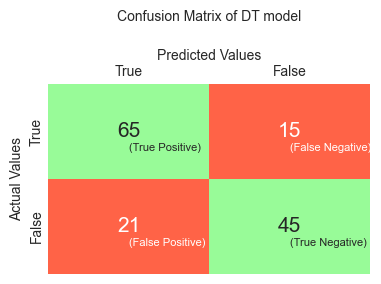

In [ ]:
# Get the confusion matrix for the DT model
cf_matrix = confusion_matrix(y_test, DT_pred)

# Get the confusion matrix

sns.set(style='white')
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(np.eye(2), annot=cf_matrix, fmt='g', annot_kws={'size': 15},
            cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
            yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)

ax.set_title('Confusion Matrix of DT model', size=10, pad=20)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
for text_elt, additional_text in zip(ax.texts, additional_texts):
    ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(), va='top', size=8)
plt.tight_layout()
plt.show()

# Comparision of models

In [ ]:
headers = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall']
table = [['Decision Tree', round(DT_accuracy, 3), round(DT_f1, 3), round(DT_precision, 3), round(DT_recall, 3)],
         ['SVM', round(SVM_accuracy, 3), round(SVM_f1, 3), round(SVM_precision, 3), round(SVM_recall, 3)],
        ['Gradient Boost', round(gb_accuracy, 3), round(gb_f1, 3), round(gb_precision, 3), round(gb_recall, 3)],
        ['Neural Networks', round(NN_accuracy, 3), round(NN_f1, 3), round(NN_precision, 3), round(NN_recall, 3)]]
print('\033[1m' + '**Comparison of Models**\n' + '\033[0m')
print(tabulate(table, headers=headers))

**Comparison of Models**

Model              Accuracy    F1 Score    Precision    Recall
---------------  ----------  ----------  -----------  --------
Decision Tree         0.753       0.714         0.75     0.682
SVM                   0.753       0.714         0.75     0.682
Gradient Boost        0.753       0.714         0.75     0.682
Neural Networks       0.753       0.714         0.75     0.682


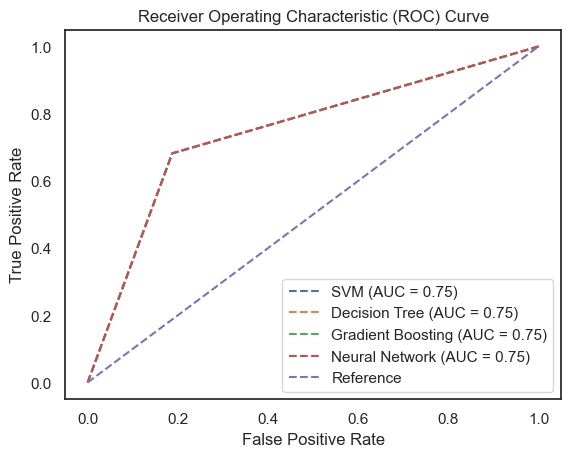

In [ ]:
# predict probabilities for testing data
probs_svm = svm_model.predict_proba(X_test)
probs_svm = probs_svm[:, 1]

probs_dt = tree_model.predict_proba(X_test)
probs_dt = probs_dt[:, 1]

probs_gb = gb_model.predict_proba(X_test)
probs_gb = probs_gb[:, 1]

# Get predicted probabilities for Neural Network model
probs_nn = mlp_model.predict_proba(X_test)
probs_nn = np.argmax(probs_nn, axis=1)

# calculate ROC curve and AUC score for each model
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probs_svm)
auc_svm = roc_auc_score(y_test, probs_svm)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt)
auc_dt = roc_auc_score(y_test, probs_dt)

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, probs_gb)
auc_gb = roc_auc_score(y_test, probs_gb)

fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, probs_nn)
auc_nn = roc_auc_score(y_test, probs_nn)

# plot ROC curves
plt.plot(fpr_svm, tpr_svm, linestyle='--', label='SVM (AUC = %0.2f)' % auc_svm)
plt.plot(fpr_dt, tpr_dt, linestyle='--', label='Decision Tree (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_gb, tpr_gb, linestyle='--', label='Gradient Boosting (AUC = %0.2f)' % auc_gb)
plt.plot(fpr_nn, tpr_nn, linestyle='--', label='Neural Network (AUC = %0.2f)' % auc_nn)

# plot random line for reference
plt.plot([0, 1], [0, 1], linestyle='--', label='Reference')

# set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# add legend
plt.legend()

# show plot
plt.show()